Enter the lowest data set value 10000
Enter the highest data set value 10000
Enter the no of sample to conduct 1000
Enter the wavelength in nm 564
Enter the beam waist in meters 45
Enter Pulse energy 34
Enter Pulse duration 45
Enter Repetition Rate 34
Enter Non-Linear Refractive Index 34


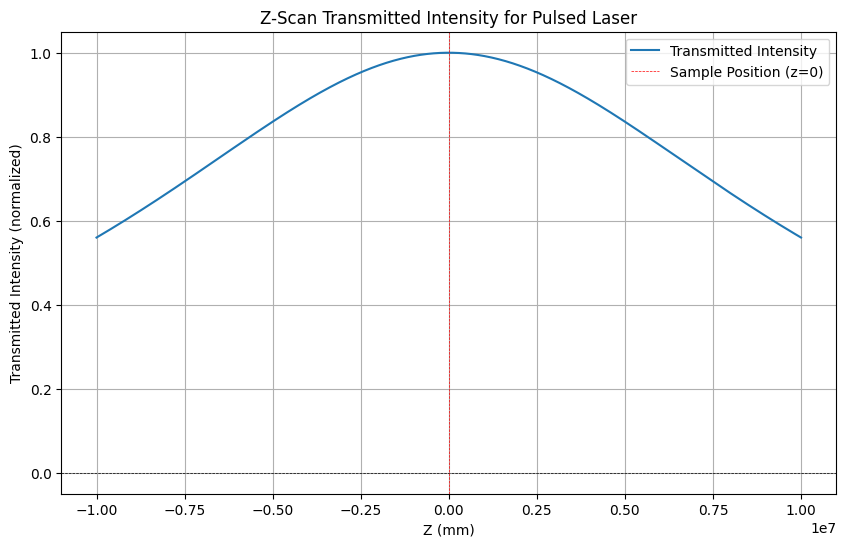

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Take Sample Input

lowest_value = int(input("Enter the lowest data set value"))
highest_value = int(input("Enter the highest data set value"))
sample_value = int(input("Enter the no of sample to conduct"))
lambda_input = int(input("Enter the wavelength in nm"))
waist_input = int(input("Enter the beam waist in meters"))
pulse_energy_input = int(input("Enter Pulse energy"))
pulse_duration_input = int(input("Enter Pulse duration"))
rep_rate_input = int(input("Enter Repetition Rate"))
non_linear_index_input = int(input("Enter Non-Linear Refractive Index"))
# Constants
w0 = waist_input*1e-3  # Beam waist in meters (1 mm)
lambda_ = lambda_input*1e-9  # Wavelength in meters (500 nm)
k = 2 * np.pi / lambda_  # Wave number

# Pulsed laser parameters
pulse_energy = pulse_energy_input*1e-3  # Pulse energy in Joules (1 mJ)
pulse_duration = pulse_duration_input*1e-9  # Pulse duration in seconds (5 ns)
rep_rate = 1e3  # Repetition rate in Hz (1 kHz)

# Nonlinear refractive index (example value)
n2 = non_linear_index_input*1e-20  # Nonlinear refractive index in m^2/W

# Generate Z values
z = np.linspace(-1*lowest_value, highest_value, sample_value)  # Z positions from lowest to highest

# Calculate the Rayleigh range
zR = np.pi * w0**2 / lambda_

# Calculate the beam radius as a function of Z
w_z = w0 * np.sqrt(1 + (z / zR)**2)  # Beam radius at position z

# Calculate the peak intensity at each Z position for a pulsed laser
I_peak = (2 * pulse_energy) / (np.pi * w_z**2 * pulse_duration)  # Peak intensity

# Calculate the change in refractive index
delta_n = n2 * I_peak  # Change in refractive index due to nonlinearity

# Calculate the transmitted intensity
# Using the formula for transmitted intensity in Z-scan
transmitted_intensity = (1 - delta_n) * I_peak

# Normalize the transmitted intensity for visualization
transmitted_intensity = transmitted_intensity / np.max(transmitted_intensity)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(z * 1e3, transmitted_intensity, label='Transmitted Intensity')
plt.title('Z-Scan Transmitted Intensity for Pulsed Laser')
plt.xlabel('Z (mm)')
plt.ylabel('Transmitted Intensity (normalized)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='red', linewidth=0.5, linestyle='--', label='Sample Position (z=0)')
plt.grid()
plt.legend()
plt.show()